In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Problem : Principal Component Analysis
**Principal component analysis** (PCA) is a technique of dimensionality reduction, which linearly maps data onto a lower-dimensional space, so that the variance of the projected data in the associated dimensions would be maximized. In this problem, you will perform PCA on a dataset of face images.

In [2]:
x_train, x_test = [], []
y_train, y_test = [], []
for i in range(1, 41):
    for j in range(1, 10):
        img = cv2.imread("data/{}_{}.png".format(i, j), cv2.IMREAD_GRAYSCALE)
        x_train.append(img)
        y_train.append(i)
    img = cv2.imread("data/{}_10.png".format(i), cv2.IMREAD_GRAYSCALE)
    x_test.append(img)
    y_test.append(i)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
#每張影像為56*46,training dataset有360張,test dataset有40張

(360, 56, 46) (360,)
(40, 56, 46) (40,)


## 1. mean face & first four eigenfaces

In [3]:
pca = PCA()
pca.fit(x_train.reshape(len(y_train),-1))

PCA()

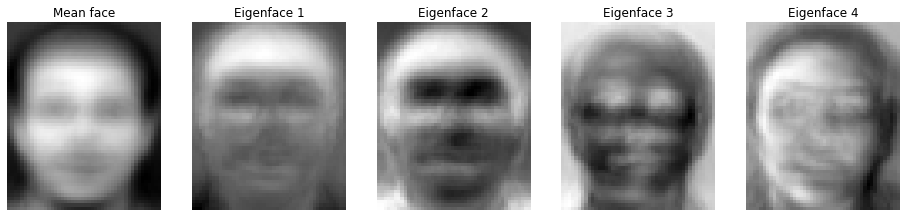

In [4]:
plt.figure(figsize=(16,12))
plt.subplot(1, 5, 1)
plt.axis("off")
plt.title("Mean face")
plt.imshow(pca.mean_.reshape(x_train[0].shape), cmap="gray")
        
for i in range(4):
        plt.subplot(1, 5, i+2)
        plt.axis("off")
        plt.title("Eigenface {}".format(i+1))
        plt.imshow(pca.components_[i].reshape(x_train[0].shape), cmap="gray")
        
plt.show()

## 2. Reconstruct person2 image1 using the first n = 3, 50, 170, 240, 345 eigenfaces
## 3. compute the mean squared error

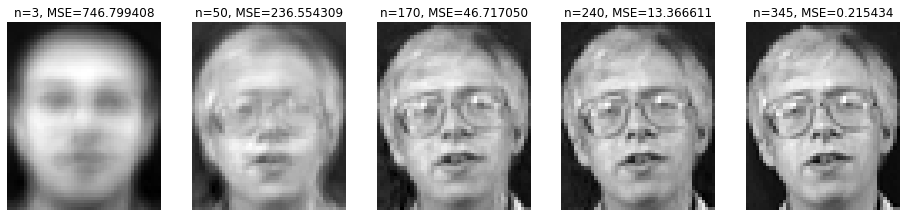

In [8]:
img = cv2.imread("data/2_1.png", cv2.IMREAD_GRAYSCALE).reshape(1,-1)
a = pca.transform(img)

plt.figure(figsize=(16,12))
n_components = [3, 50, 170, 240, 345]
for i, n in enumerate(n_components):
    face = np.zeros(img.shape) #先生成黑色的圖
    for j in range(n):
        face = face + a[0][j]*pca.components_[j] #reconstruction
    face = face + pca.mean_
    MSE = np.mean((face-img)**2)
    plt.subplot(1, 5, i+1)
    plt.axis("off")
    plt.title("n={}, MSE={:2f}".format(n, MSE))
    plt.imshow(face.reshape(x_train[0].shape), cmap="gray")
    
plt.show()

## 4. cross-validation results

In [9]:
reduced_x_train = pca.transform(x_train.reshape(len(y_train),-1))
K = [1, 3, 5]
N = [3, 50, 170]
random = np.random.permutation(len(y_train)) #把資料打亂
reduced_x_train = reduced_x_train[random]
y_train_random = y_train[random]
for k in K:
    print("K={}".format(k))
    knn =  KNeighborsClassifier(n_neighbors=k)
    for n in N:
        print(" N={}, ".format(n), end="")
        score = cross_val_score(knn, reduced_x_train[:,:n], y_train_random, cv=3)
        print("Score={:.4f}".format(score.mean()))

K=1
 N=3, Score=0.7111
 N=50, Score=0.9694
 N=170, Score=0.9750
K=3
 N=3, Score=0.6361
 N=50, Score=0.9361
 N=170, Score=0.9278
K=5
 N=3, Score=0.5861
 N=50, Score=0.8778
 N=170, Score=0.8472


## 5. recognition rate of the testing set

In [10]:
k=1
n=50

reduced_x_test = pca.transform(x_test.reshape(len(y_test),-1))
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(reduced_x_train[:,:n], y_train_random)
print("Accuracy = {}".format(knn.score(reduced_x_test[:,:n],y_test)))

Accuracy = 0.925
